In [1]:
# Import packages
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import h5py
import requests
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import modules.reflectance as refl

In [2]:
# Get NEON reflectance data from NEON API
# Endpoints are data product, site, date, and release year
neon_base = "https://data.neonscience.org/api/v0/data"
data_product = "/DP3.30006.001"
site = "/GRSM"
post_fire_release = "/2017-10?package=basic&release=RELEASE-2022"
post_fire_url = neon_base + data_product + site + post_fire_release
post_fire_data = requests.get(post_fire_url)

# Similarly for the pre-fire data
pre_fire_release = "/2016-06?package=basic&release=RELEASE-2022"
pre_fire_url = neon_base + data_product + site + pre_fire_release
pre_fire_data = requests.get(pre_fire_url)

In [3]:
# Get NEON reflectance data
post_fire_url = (
    'https://storage.googleapis.com/neon-aop-products/2017/FullSite/D07/2017_GRSM_3/L3/Spectrometer/Reflectance/NEON_D07_GRSM_DP3_274000_3947000_reflectance.h5')
pre_fire_url = (
    'https://storage.googleapis.com/neon-aop-products/2016/FullSite/D07/2016_GRSM_2/L3/Spectrometer/Reflectance/NEON_D07_GRSM_DP3_274000_3947000_reflectance.h5')

post_data = et.data.get_data(url=post_fire_url)
pre_data = et.data.get_data(url=pre_fire_url)

In [4]:
# Set working directory
os.chdir(os.path.join(
    et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads'))

# Data paths
post_fire_path = os.path.join(
    'NEON_D07_GRSM_DP3_274000_3947000_201710_reflectance.h5')
pre_fire_path = os.path.join(
    'NEON_D07_GRSM_DP3_274000_3947000_201606_reflectance.h5')

In [5]:
post_fire_refl, post_fire_metadata = refl.aop_h5refl2array(post_fire_path)
pre_fire_refl, pre_fire_metadata = refl.aop_h5refl2array(pre_fire_path)

In [8]:
# # Get Chimney Tops 2 fire boundary
# chimney_fire_path = (
#     'https://github.com/AreteY/post-wildfire-vegetation-change/blob/main/data/mtbs_chimneytops2_burn_bndy.shp')
# chimney_fire_bound = gpd.read_file(chimney_fire_path)
# chimney_fire_reproj = chimney_fire_bound.to_crs(epsg=32617)

In [9]:
#h5py.File(post_fire_path, 'r', driver='ros3')

In [10]:
# def aop_h5refl2array(refl_filename):
#     """Reads in a hdf5 file and returns an array and select metadata.
    
#     This function is defined for the NEON AOP Reflectance hdf5 file 
#     format. Adapted from the NEON Tutorial "Plot a Spectral Signature in
#     Python - Tiled Data".
    
#     Parameters
#     ----------
#     refl_filename : str
#        Relative path of reflectance hdf5 file.
    
#     Returns
#     -------
#     refl_array : h5py dataset
#        Array of reflectance values.
#     metadata : dict
#        Dictionary containing the following metadata:
#            epsg : coordinate reference system code as integer.
#            *bad_band_window1 : numpy array of wavelengths to ignore.
#            *bad_band_window2 : numpy array of wavelengths to ignore.
#            extent : tuple of spatial extent (xmin, xmax, ymin, ymax).
#            map_info : str of map information.
#            *no_data_value : -9999.0
#            projection : str of projection information.
#            *res : dict containing 'pixel_width' and 'pixel_height'.
#            *scale_factor : 10000.0
#            shape : tuple of reflectance shape (y, x, number of bands).
#            wavelength : h5py wavelengths dataset of the bands.
#        * Asterixed values are the same for all NEON AOP hyperspectral 
#        reflectance files processed 2016 & after.
#     """
#     # Read reflectance hdf5 file 
#     hdf5_file = h5py.File(refl_filename, 'r', driver='ros3')

#     # Get site name
#     file_attrs_string = str(list(hdf5_file.items()))
#     file_attrs_string_split = file_attrs_string.split("'")
#     sitename = file_attrs_string_split[1]
    
#     # Extract reflectance dataset
#     refl = hdf5_file[sitename]['Reflectance']
#     refl_array = refl['Reflectance_Data']
#     refl_shape = refl_array.shape
    
#     # Create dictionary containing relevant metadata information
#     metadata = {}
#     metadata['shape'] = refl_array.shape
#     metadata['wavelength'] = (
#         refl['Metadata']['Spectral_Data']['Wavelength'])

#     # Extract no data value & data scale factor
#     metadata['no_data_value'] = float(
#         refl_array.attrs['Data_Ignore_Value'])
#     metadata['scale_factor'] = float(refl_array.attrs['Scale_Factor'])
    
#     # Extract bad band windows
#     metadata['bad_band_window1'] = (
#         refl.attrs['Band_Window_1_Nanometers'])
#     metadata['bad_band_window2'] = (
#         refl.attrs['Band_Window_2_Nanometers'])
    
#     # Extract projection information
#     metadata['projection'] = (
#         refl['Metadata']['Coordinate_System']['Proj4'][()])
#     metadata['epsg'] = int(
#         refl['Metadata']['Coordinate_System']['EPSG Code'][()])
    
#     # Extract resolution from map information
#     mapinfo = refl['Metadata']['Coordinate_System']['Map_Info'][()]
#     mapinfo_string = str(mapinfo)
#     mapinfo_split = mapinfo_string.split(",")
#     metadata['res'] = {}
#     metadata['res']['pixel_width'] = float(mapinfo_split[5])
#     metadata['res']['pixel_height'] = float(mapinfo_split[6])
    
#     # Extract the upper left-hand corner coordinates from map info
#     xmin = float(mapinfo_split[3])
#     ymax = float(mapinfo_split[4])
    
#     # Calculate the xmax and ymin values from the dimensions
#     xmax = xmin + (refl_shape[1] * metadata['res']['pixel_width']) 
#     ymin = ymax - (refl_shape[0] * metadata['res']['pixel_height'])
    
#     # Store the extent
#     metadata['extent'] = (xmin, xmax, ymin, ymax)
    
#     hdf5_file.close        
#     return refl_array, metadata

In [11]:
# post_fire_refl, post_fire_metadata = aop_h5refl2array(post_fire_path)
# pre_fire_refl, pre_fire_metadata = aop_h5refl2array(pre_fire_path)

In [12]:
def subset_clean_band(refl_array,metadata,band_number):
    """Extracts and cleans a reflectance band.
    
    The band is cleaned by applying the no data value and scale factor
    from the metadata dictionary. Adapted from the NEON Tutorial "Band
    Stacking, RGB & False Color Images, and Interactive Widgets in
    Python - Flightline Data".
    
    Parameters
    ----------
    refl_array: h5py dataset
       Reflectance array of dimensions (y,x,426) from which a band is 
       extracted.
    metadata: dict
       Reflectance metadata associated with reflectance array generated
       by aop_h5refl2array function.
    band_number: int
       Band number to be extracted (integer between 1-426).
    
    Returns 
    -------
    clean_band: numpy array
       Subsetted band array with no data value set to NaN and scale 
       factor applied.
    """
    clean_band = refl_array[:, :, band_number-1].astype(float)
    clean_band[clean_band==int(metadata['no_data_value'])]=np.nan
    clean_band = clean_band/metadata['scale_factor']
    
    return clean_band

def stack_subset_bands(refl_array, metadata, bands):
    """Subsets, cleans, and stacks bands from a reflectance array.
    
    Parameters
    ----------
    refl_array: h5py dataset
       Reflectance array of dimensions (y,x,426) from which multiple 
       bands (typically 3) are extracted.
    metadata: dict 
       Reflectance metadata associated with reflectance array generated
       by aop_h5refl2array function.
    bands: tuple
       Band numbers to be stacked (integer between 1-426).

    Returns 
    -------
    stacked_array: numpy array
       Array of subsetted, stacked bands with no data value set to NaN 
       and scale factor applied.
    """
    # Calculate rows and columns of the stacked array using the extent
    rows = int(metadata['extent'][3] - metadata['extent'][2])
    cols = int(metadata['extent'][1] - metadata['extent'][0])
    
    # Initialize stacked array with zeros
    stacked_array = np.zeros((rows, cols, len(bands)))
    
    # Initialize band dictionary and names
    band_dict = {}
    band_names = []
    
    for i in range(len(bands)):
        band_names.append("b"+str(bands[i]))
        band_dict[band_names[i]] = subset_clean_band(
            refl_array, metadata, bands[i])
        stacked_array[...,i] = band_dict[band_names[i]]
                        
    return stacked_array

In [13]:
pre_fire_stack = stack_subset_bands(
    pre_fire_refl, pre_fire_metadata, (58, 84, 117, 400))

In [14]:
post_fire_stack = stack_subset_bands(
    post_fire_refl, post_fire_metadata, (58, 84, 117, 400))

In [15]:
# Calculate NBR
post_fire_nbr = (
    post_fire_stack[:, :, 2] - post_fire_stack[:, :, 3]) / (
    post_fire_stack[:, :, 2] + post_fire_stack[:, :, 3])

pre_fire_nbr = (
    pre_fire_stack[:, :, 2] - pre_fire_stack[:, :, 3]) / (
    pre_fire_stack[:, :, 2] + pre_fire_stack[:, :, 3])

# Calculate dNBR
dnbr = pre_fire_nbr - post_fire_nbr

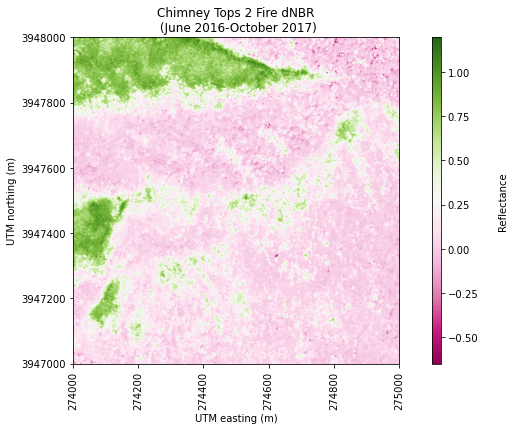

In [16]:
# Plot dNBR
fig, ax = plt.subplots(figsize=(12, 6))

plot = plt.imshow(dnbr,
                  extent=post_fire_metadata['extent'],
                  cmap='PiYG')

cbar = plt.colorbar(plot, aspect=40)
cbar.set_label('Reflectance', rotation=90, labelpad=20)

# Remove scientific notation from tile coordinates
ax.ticklabel_format(useOffset=False, style='plain')

ax.set(title='Chimney Tops 2 Fire dNBR\n (June 2016-October 2017)',
       xlabel='UTM easting (m)',
       ylabel='UTM northing (m)')
rotatexlabels = plt.setp(ax.get_xticklabels(), rotation=90)